In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Loading Images

In [6]:
from os import listdir
from numpy import asarray
from PIL import Image


In [7]:
def load_image(filename):
    image = Image.open(filename)
    #Convert to RGB if needed
    image = image.convert('RGB')
    #Convert to Array
    pixels = asarray(image)
    return pixels

In [8]:
#load images and extract faces for all images in a directory
def load_faces(directory, n_faces):
    faces=list()
    #enumerate files
    for filename in listdir(directory):
        #Load image
        pixels = load_image(directory+filename)
        #store
        faces.append(pixels)
        #stop once we have enough
        if len(faces)>=n_faces:
            break
    return asarray(faces)


In [15]:
#Plot Faces
def plot_faces(faces,n):
    for i in range(n*n):
        plt.subplot(n,n, 1+i)
        plt.axis('off')
        plt.imshow(faces[i])
    plt.show()

In [16]:
datapath = "/Users/ashutosh.k/Documents/datascience/datasets/CelebFaces/celeba-dataset/img_align_celeba/img_align_celeba/"

In [17]:
directory = datapath
faces = load_faces(directory, 25)

In [18]:
faces.shape

(25, 218, 178, 3)

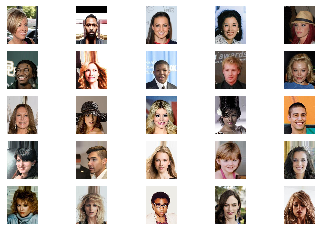

In [20]:
plot_faces(faces,5)

### Extracting only the faces in the images 

### Multi Task Cascaded Convolutional Neural Networks

In [25]:
from mtcnn.mtcnn import MTCNN

In [26]:
print(mtcnn.__version__)

0.1.0


In [28]:
### Extracting and resizing faces

In [29]:
from os import listdir
from numpy import asarray
from PIL import Image
from numpy import savez_compressed
from mtcnn.mtcnn import MTCNN

In [30]:
def load_image(filename):
    image = Image.open(filename)
    #Convert to RGB if needed
    image = image.convert('RGB')
    #Convert to Array
    pixels = asarray(image)
    return pixels

In [36]:
def extract_face(model, pixels, required_size=(80,80)):
    #detect face in the image
    faces = model.detect_faces(pixels)
    #skip where face is not found
    if len(faces)==0:
        return None
    #extract details of face
    x1,y1,width, height = faces[0]['box']
    #force detected pixel values to be positive
    x1,y1 = abs(x1), abs(y1)
    #convert into coordinates
    x2,y2 = x1+width, y1+height
    #retrieve face pixels
    face_pixels = pixels[y1:y2,x1:x2]
    #resize pixels to model size
    image = Image.fromarray(face_pixels)
    image = image.resize(required_size)
    face_array = asarray(Image)
    return face_array

In [39]:
def load_faces(directory, n_faces):
    #prepare model
    model = MTCNN()
    faces=list()
    #enumerate filenames
    for filename in listdir(directory):
        #load the image
        pixels = load_image(directory+filename)
        #get face
        face = extract_face(model, pixels)
        if face is None:
            continue
        #store
        faces.append(face)
        print(len(faces), face.shape)
        #stop if enough
        if len(faces)>=n_faces:
            break
    return asarray(faces)

In [40]:
all_faces = load_faces(directory, 25)
print('Loaded: ',all_faces.shape)

#Uncomment if you want to save the images
#savez_compressed('img_align_celeba.npz', all_faces)
# load the prepared dataset


1 ()
2 ()
3 ()
4 ()
5 ()
6 ()
7 ()
8 ()
9 ()
10 ()
11 ()
12 ()
13 ()
14 ()
15 ()
16 ()
17 ()
18 ()
19 ()
20 ()
21 ()
22 ()
23 ()
24 ()
25 ()
Loaded:  (25,)


TypeError: can't pickle module objects

In [41]:
from numpy import load
# load the face dataset
data = load('img_align_celeba.npz') 
faces = data['arr_0'] 
print('Loaded: ', faces.shape)

BadZipFile: File is not a zip file